In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

import cv2
import numpy as np
import random

In [187]:
import numpy as np
from scipy import interpolate
def control_points2curve_points(ctp, num=100):
#     ctp =np.array( [(3 , 1), (2.5, 4), (0, 1), (-2.5, 4),
#                 (-3, 0), (-2.5, -4), (0, -1), (2.5, -4), (3, -1),]) + 4
    x=ctp[:,0]
    y=ctp[:,1]

    l=len(x)  

    t=np.linspace(0,1,l-2,endpoint=True)
    t=np.append([0,0,0],t)
    t=np.append(t,[1,1,1])

    tck=[t,[x,y],3]
    u3=np.linspace(0,1,(max(l*2,num)),endpoint=True)
    out = interpolate.splev(u3,tck)
    return out

In [188]:
def curve_points2fig(out, linewidth=10.0, filename='examples.png'):
    plt.plot(out[0],out[1],'b',linewidth=linewidth)
    plt.axis('off')
    plt.savefig(filename) 
    plt.show()

In [189]:
def vis(ctp):
    #     ctp =np.array( [(3 , 1), (2.5, 4), (0, 1), (-2.5, 4),
    #                 (-3, 0), (-2.5, -4), (0, -1), (2.5, -4), (3, -1),]) + 4
    x=ctp[:,0]
    y=ctp[:,1]
    out = control_points2curve_points(ctp, num=100)
    plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
    #plt.plot(x,y,'ro',label='Control points only')
    plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
    plt.legend(loc='best')
    plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
    plt.title('Cubic B-spline curve evaluation')
    plt.show()

In [190]:
def grayfig2stroke(_img, blur_ratio = 5):
    img = np.float32(_img)
    alpha = (img - np.min(img)) / (np.max(img) - np.min(img))
    alpha = cv2.blur(alpha, (blur_ratio, blur_ratio))
    plt.imshow(alpha)
    plt.show()

In [191]:
def gen_ctp(num = 6):
    assert num > 2
    return np.random.rand(num, 2)

[[0.9806799  0.48603427]
 [0.35614655 0.5491605 ]
 [0.31463389 0.25297797]
 [0.87267042 0.53235349]]


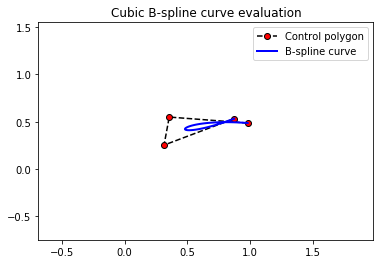

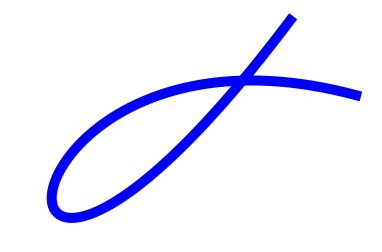

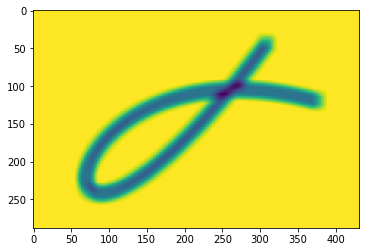

(288, 432)


In [224]:
#ctp = ( np.array( [(3 , 1), (2.5, 4), (0, 1), (-2.5, 4),
#            (-3, 0), (-2.5, -4), (0, -1), (2.5, -4), (3, -1),]) + 4 ) / 8.0
#x = np.arange(0+2*np.pi+np.pi/4, 2*np.pi+np.pi/4+2*np.pi+np.pi/4, 2*np.pi/8)
#y = np.sin(x)
#ctp = np.array([x,y]).transpose((1, 0))

ctp = gen_ctp(num = 4)
print (ctp)
vis(ctp)

out = control_points2curve_points(ctp, num=100)
curve_points2fig(out, linewidth=10.0, filename='examples.png')
img = cv2.imread('examples.png', cv2.IMREAD_GRAYSCALE)
grayfig2stroke(img, blur_ratio=20)
print (img.shape)

In [193]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)

[[ 0.00000000e+00  7.85398163e-01  1.57079633e+00  2.35619449e+00
   3.14159265e+00  3.92699082e+00  4.71238898e+00  5.49778714e+00
   6.28318531e+00]
 [ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
   1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
  -2.44929360e-16]]


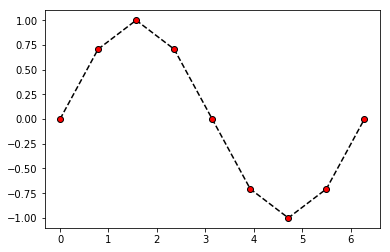

In [179]:
plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
print (np.array([x,y]))